<a href="https://colab.research.google.com/github/Soumya-dg/Titanic-Survival/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC 2 PASSENGER SURVIVAL PREDICTION**


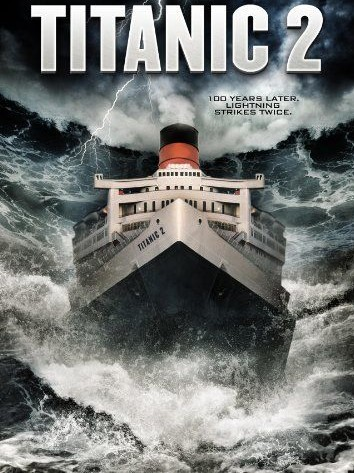

*DESCRIPTION OF THE DATASET:*

survival:    Survival 

PassengerId: Unique Id of a passenger
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    Number of siblings / spouses aboard the Titanic     
parch:    Number of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:       Cabin number     
embarked:    Port of Embarkation
            
            C = Cherbourg, Q = Queenstown, S = Southampton

*KEY:*

0 = No, 1 = Yes

Classes:

1 = 1st, 2 = 2nd, 3 = 3rd

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 15)

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Get a count of the number of survivors  
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


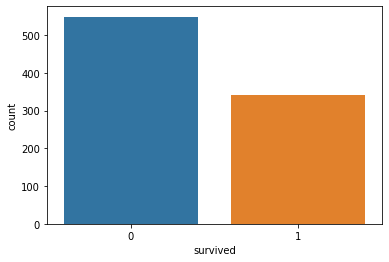

In [ ]:
#Visualize the count of number of survivors
sns.countplot(titanic['survived'],label="count")

In [ ]:
print('Lets look at survival rate by sex:')
print(titanic.groupby('sex')[['survived']].mean())
print('****************************************************')

print('Lets look at survival rate by sex and class:')
print(titanic.pivot_table('survived', index='sex', columns='class'))

Lets look at survival rate by sex:
        survived
sex             
female  0.742038
male    0.188908
****************************************************
Lets look at survival rate by sex and class:
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


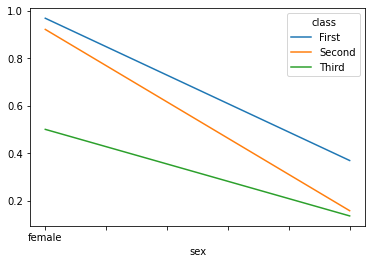

In [ ]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

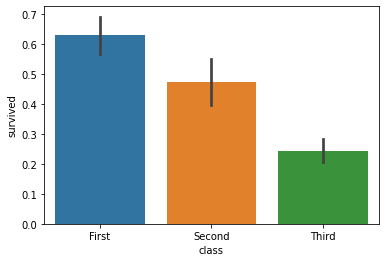

In [ ]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=titanic)

In [ ]:
# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])
 
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


 **Splitting the training and testing data**

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

**K Nearest Neighbor Classifier**

*Why have we used K Nearest Neighbor Classifier?*





*   The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. 
*  There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm.


*  KNN can be useful in case of nonlinear data. It can be used with the regression problem.
*  Output value for the object is computed by the average of k closest neighbors value.




In [ ]:
 #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

**DecisionTreeClassifier**
 
 *Why have we used DecisionTreeClassifier?*


*   The understanding level of Decision Trees algorithm is so easy compared with other classification algorithms. 
*   The decision tree algorithm tries to solve the problem, by using tree representation.

*    Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.




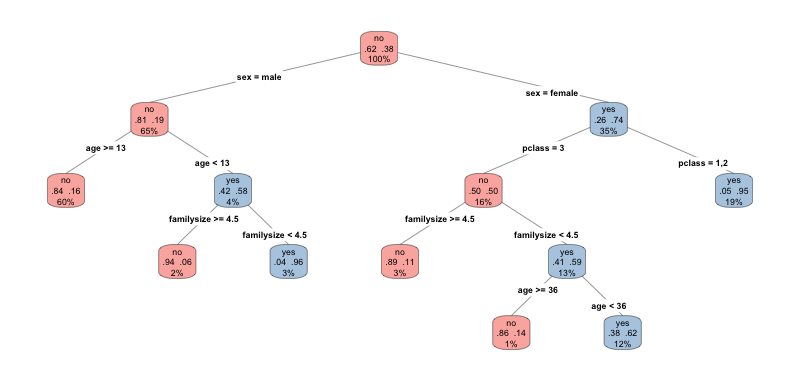

In [ ]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 4)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [ ]:
#Print the model accuracy:
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train)*100,'%')
print('[2]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train)*100,'%')
print( knn.score(X_test, Y_test)*100,'%')
print( tree.score(X_test, Y_test)*100,'%')

[1]K Nearest Neighbor Training Accuracy: 76.70682730923694 %
[2]Decision Tree Classifier Training Accuracy: 98.59437751004016 %
69.62616822429906 %
78.97196261682244 %


**What is a confusion matrix and why is it required?**


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Example:

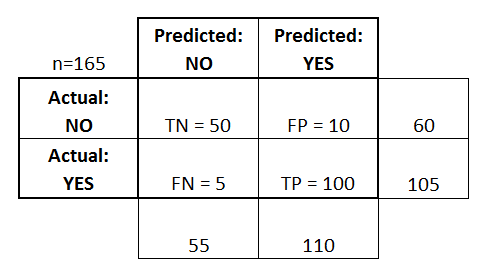


-There are two possible predicted classes: "yes" and "no". If we were predicting the survival of a person, for example, "yes" would mean they have survived the titantic, and "no" would mean they did not survive the titanic.

-The classifier made a total of 165 predictions (e.g., 165 passengers).

-Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.

-In reality, 105 passengers survived the titanic, and 60 passengers did not.



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix of KNN:",confusion_matrix(Y_test, knn.predict(X_test)))
print("Confusion matrix of Decision Tree:",confusion_matrix(Y_test, tree.predict(X_test)))

Confusion matrix of KNN: [[102  30]
 [ 35  47]]
Confusion matrix of Decision Tree: [[107  25]
 [ 20  62]]


In [ ]:
#Print Prediction of KNN
pred = knn.predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)

print("----------------------------------------------------------------------------")

#Print Prediction of Decision tree classifier
pred = tree.predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0]

[0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0]
----------------------------------------------------------------------------
[0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  82436      0 --:--:-- --:--:-- --:--:-- 82436
[0]


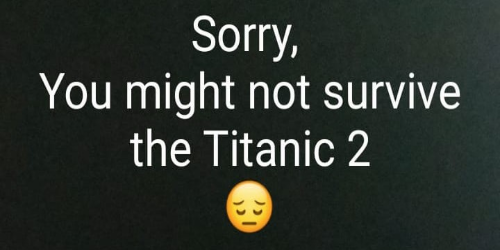

In [ ]:
import cv2
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png 
from google.colab.patches import cv2_imshow 

#survived	pclass,	sex,	age,	sibsp,	parch,	fare,	embarked
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of KNN
pred = knn.predict(my_survival)
print(pred)

if pred == 0:
  img = cv2.imread('/content/titanic1111', cv2.IMREAD_UNCHANGED) 
  rs=cv2.resize(img,(500,250))
  cv2_imshow(rs)
else:
  img = cv2.imread('/content/titanic22.jpg', cv2.IMREAD_UNCHANGED)
  rs=cv2.resize(img,(500,250))
  cv2_imshow(rs) 
  

[1]


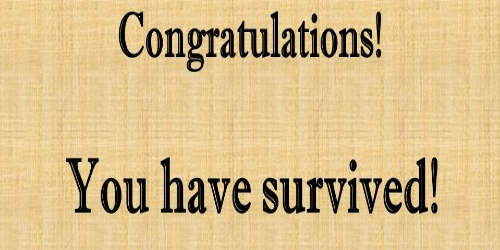

In [ ]:
#survived	pclass,	sex,	age,	sibsp,	parch,	fare,	embarked
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Decision tree classifier
pred = tree.predict(my_survival)
print(pred)

if pred == 0:
  img = cv2.imread('/content/titanic1111.jpg', cv2.IMREAD_UNCHANGED) 
  rs=cv2.resize(img,(500,250))
  cv2_imshow(rs)
else:
  img = cv2.imread('/content/titanic22.jpg', cv2.IMREAD_UNCHANGED) 
  rs=cv2.resize(img,(500,250))
  cv2_imshow(rs)

# ***From the models implemented , the accuracy of decision tree classifier(DTC) is greater than that of KNN, thus the prediction of DTC can be considered in this case!***

[1]K Nearest Neighbor Training Accuracy: 78.9103690685413 %

[2]Decision Tree Classifier Training Accuracy: 99.29701230228471 %